# Importing necessary libraries:

In [36]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np
# Data visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# To suppress the warnings caused
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset:

In [3]:
df = pd.read_csv("haberman.csv",names=["Patient's Age","Year of operation","No.of auxillary nodes","Result"])
df.head() # reading the first 5 rows for visualising the Data frame

,Patient's Age,Year of operation,No.of auxillary nodes,Result
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### As year is in 1900's adding 1900 to year column for simplicity

In [4]:
df["Year of operation"] = df["Year of operation"]+1900
df.head()

,Patient's Age,Year of operation,No.of auxillary nodes,Result
0,30,1964,1,1
1,30,1962,3,1
2,30,1965,0,1
3,31,1959,2,1
4,31,1965,4,1


### Seeing all Column Names:

In [6]:
df.columns 

Index(['Patient's Age', 'Year of operation', 'No.of auxillary nodes',
       'Result'],
      dtype='object')

## Datapoints and features:

### 1. Determining rows and columns of the data

In [7]:
df.shape 

(306, 4)

### 2. Some Statistical insights of the data

In [8]:
df.describe() 

,Patient's Age,Year of operation,No.of auxillary nodes,Result
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,1962.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,1958.000000,0.000000,1.000000
25%,44.000000,1960.000000,0.000000,1.000000
50%,52.000000,1963.000000,1.000000,1.000000
75%,60.750000,1965.750000,4.000000,2.000000
max,83.000000,1969.000000,52.000000,2.000000


## Value counts of each class type in output column of data:

In [9]:
df["Result"].value_counts()

## 1 - survived >5 years
## 2 - died within 5 years

1    225
2     81
Name: Result, dtype: int64

## 2D scatter plot

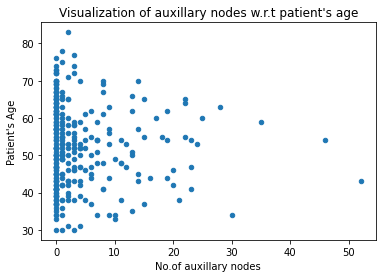

In [10]:
df.plot(kind="scatter",x="No.of auxillary nodes",y="Patient's Age", title = "Visualization of auxillary nodes w.r.t patient's age")
plt.show()

### For better Visualization of data using Seaborn

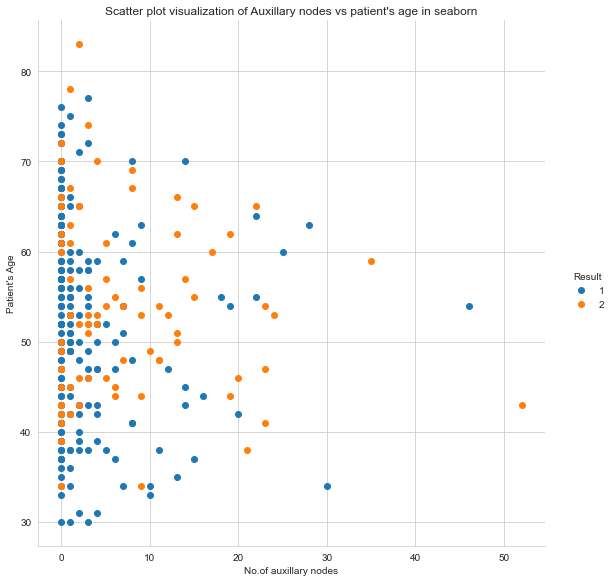

In [16]:
sns.set_style("whitegrid")
sns.FacetGrid(df,hue="Result",height=8,margin_titles=True)\
    .map(plt.scatter,"No.of auxillary nodes","Patient's Age")\
    .add_legend()

plt.title('Scatter plot visualization of Auxillary nodes vs patient\'s age in seaborn')
plt.show();

**Observations:**

1. As year of operation may not be necessary for predicting the result, just analyzing the other 2 columns w.r.t result
2. Even the no. of auxillary nodes is between 0-10, death rate <5 yrs is having more occurences but the survival rate is high for people having <10 nodes
3. But if the count of auxillary nodes is >10, there are more chances of dying within 5 yrs of operation

## Pairplot: (To compare each column with the other column data)
### will come under (bivariate analysis)

1. Will be extensively used to view high dimension dadta in 2D data for maximum extent
2. Diagonal elements can be treated as PDF for each column
3. Upper diagonal elements can only be considered as they are the replica of lower diagonal elements

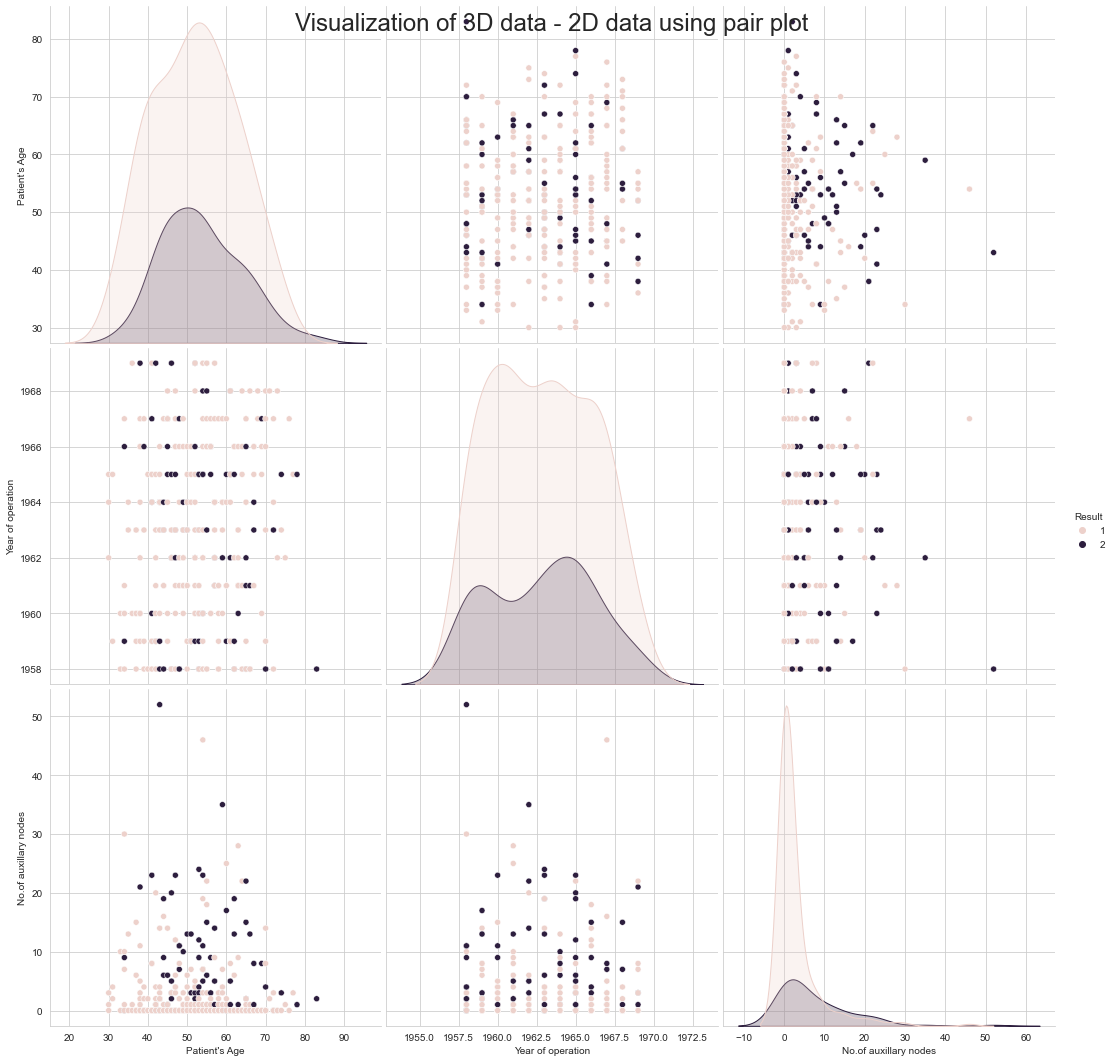

In [33]:
sns.set_style("whitegrid") # no.of plots = 3c2 = 3!/2! = 3
x = sns.pairplot(df,hue="Result",height = 5)
x.fig.suptitle('Visualization of 3D data - 2D data using pair plot',fontsize=24)
plt.show()

**Observations:**
1. pdf curves of all the feature data are almost equal to the gaussian bell curve and we can say the data is sufficiently following Normal distrubution
2. At the starting years the patients count was more compared to later, may be reduced due to sophisticated medicinal cure 
3. If the no.of axillary nodes are equal to 0 then most of them survived after the operation
4. But as in each case as the curves for both result-1 and result-2 are overlapping much, its very hard to interpret the conclusions through normal if else statements and may land in wrong prediction of output
5. If axillary nodes ==0 then may be there is more probability of survival
6. If axillary nodes count is more than 20 then there is high chance of dying less than 5 yrs

## Histogram, PDF, CDF (will fall under univariate analysis)

### To visualize data on the single dimension for more analysis

In [19]:
df_survival_gr_5y = df[df["Result"] == 1]
df_died_ls_5y = df[df["Result"] == 2]
len(df_survival_gr_5y)+len(df_died_ls_5y) # to validate whether the data matches after split

306

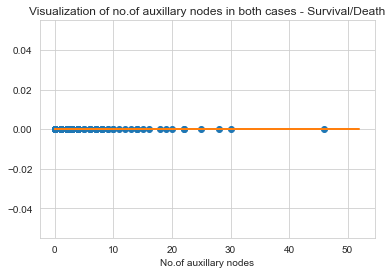

In [21]:
plt.plot(df_survival_gr_5y["No.of auxillary nodes"],np.zeros_like(df_survival_gr_5y["No.of auxillary nodes"]),'o')
plt.plot(df_died_ls_5y["No.of auxillary nodes"],np.zeros_like(df_died_ls_5y["No.of auxillary nodes"]))
plt.xlabel("No.of auxillary nodes")
plt.title("Visualization of no.of auxillary nodes in both cases - Survival/Death")
plt.show() 

**Observations:**
1. As there are many overlaps and we cant be able to distinguish on basis of axillary nodes

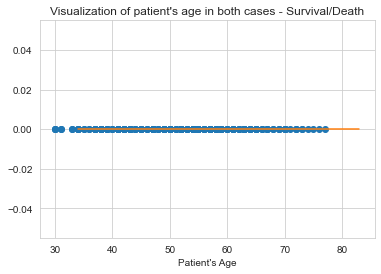

In [34]:
plt.plot(df_survival_gr_5y["Patient's Age"],np.zeros_like(df_survival_gr_5y["Patient's Age"]),'o')
plt.plot(df_died_ls_5y["Patient's Age"],np.zeros_like(df_died_ls_5y["Patient's Age"]))
plt.xlabel("Patient's Age")
plt.title("Visualization of patient's age in both cases - Survival/Death")
plt.show()

**Observations:**
1. As there are many overlaps and we cant be able to distinguish on basis of patients age

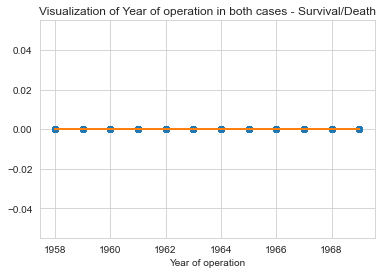

In [42]:
plt.plot(df_survival_gr_5y["Year of operation"],np.zeros_like(df_survival_gr_5y["Year of operation"]),'o')
plt.plot(df_died_ls_5y["Year of operation"],np.zeros_like(df_died_ls_5y["Year of operation"]))
plt.xlabel("Year of operation")
plt.title("Visualization of Year of operation in both cases - Survival/Death")
plt.show() ## There are many overlaps and cant be able to distinguish on basis of Year of operation

**Observations:**

1. As there are many overlaps and we cant be able to distinguish on basis of Year of operation

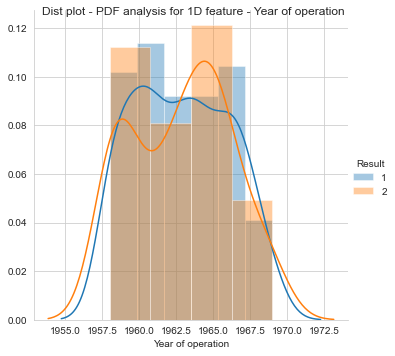

In [50]:
x1 = sns.FacetGrid(df,hue="Result",height=5)\
.map(sns.distplot,"Year of operation")\
.add_legend()

x1.fig.suptitle("Dist plot - PDF analysis for 1D feature - Year of operation")
plt.show()

**Observations:**

1. As there are many overlaps as before in the PDF curve, we cant be able to distinguish or built a primary ML assumptions on basis of Year of operation

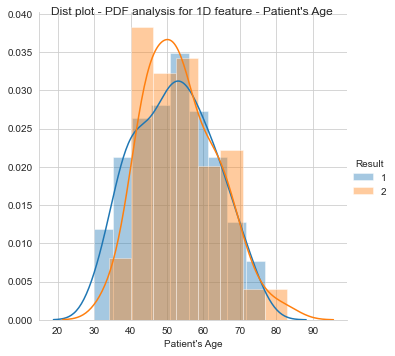

In [49]:
x2 = sns.FacetGrid(df,hue="Result",height=5)\
.map(sns.distplot,"Patient's Age")\
.add_legend()

x2.fig.suptitle("Dist plot - PDF analysis for 1D feature - Patient's Age")
plt.show()

**Observations:**

1. Here we can say that the patients below ~37 years got survived irrespective of axillary nodes

2. As there are many overlaps after that point in the PDF curve, we cant be able to distinguish or built a primary ML assumptions on basis of Year of operation

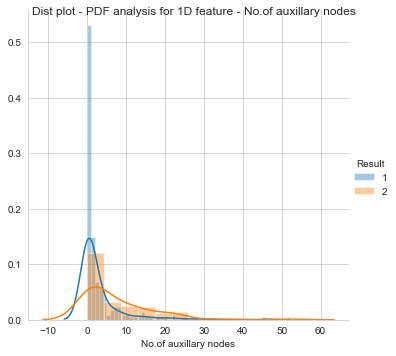

In [51]:
x3 = sns.FacetGrid(df,hue="Result",height=5)\
.map(sns.distplot,"No.of auxillary nodes")\
.add_legend()

x3.fig.suptitle("Dist plot - PDF analysis for 1D feature - No.of auxillary nodes")
plt.show()

**Observations:**

1. Here we can say that the Auxillary nodes ~8 to 10 got survived

2. As there are many overlaps after that point in the PDF curve, we cant be able to distinguish or built a primary ML assumptions on basis of Year of operation

## Plotting CDF curve for understanding the percentages of data

In [53]:
df_survival_gr_5y["Patient's Age"].max() # -> 77
df_survival_gr_5y["Patient's Age"].min() # -> 30 

30

**Calculation Methodology**
1. Now between 30 and 77 -> 77-30=47 -> 47/10= 4.7, so bin will be formed with 4.7 width each
2. For example, 30 - 34.7 will fall as 1 bin and freq of this will be plotted on y axis
3. As we are plotting cdf and pdf we have control over only 1 axis - i.e; x-axis
4. So in order to say the data who got survived > 5y, directly we have to take df_survival_gr_5y instead of normal df

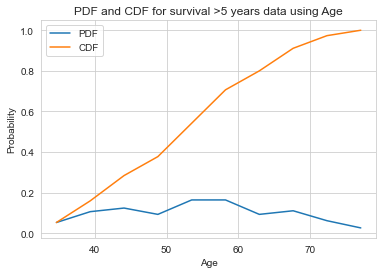

In [61]:
counts, bin_edges = np.histogram(df_survival_gr_5y["Patient's Age"],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Age")
plt.ylabel("Probability")
plt.title("PDF and CDF for survival >5 years data using Age")
plt.legend(["PDF","CDF"])
plt.show()

**Observations**

1. Now we can say like ~80% of the survival>5yrs are having age<=63

## Steps for visualizing PDF and CDF for auxillary nodes data:
1. np.histogram is a great function for calculating the pdf and cdf curves
2. More the bins more the resolution it comes and the graph will somewhat changes to accurate
3. Because we are chunking the dataset more and touching almost another 10 sets of data

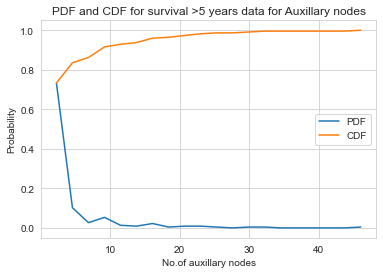

In [62]:
counts, bin_edges = np.histogram(df_survival_gr_5y["No.of auxillary nodes"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("No.of auxillary nodes")
plt.ylabel("Probability")
plt.title("PDF and CDF for survival >5 years data for Auxillary nodes")
plt.legend(["PDF","CDF"])
plt.show()

**Observations:**

1. we can say from this graph like, 90% of the people are having <10 axillary nodes and have survived after the operation

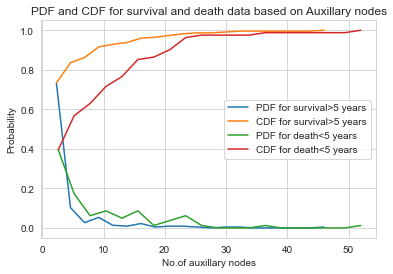

In [70]:
counts, bin_edges = np.histogram(df_survival_gr_5y["No.of auxillary nodes"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(df_died_ls_5y["No.of auxillary nodes"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("No.of auxillary nodes")
plt.ylabel("Probability")
plt.title("PDF and CDF for survival and death data based on Auxillary nodes")
plt.legend(["PDF for survival>5 years","CDF for survival>5 years",
           "PDF for death<5 years","CDF for death<5 years"])
plt.show()

**Observations:**

1. we can say from this graph like, the death rate was very minimal for people having less than 10 auxillary nodes
2. persons with more auxillary nodes have high chance of dying less than 5 years of operation

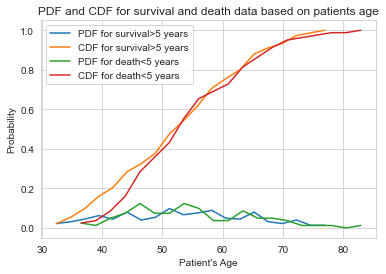

In [69]:
counts, bin_edges = np.histogram(df_survival_gr_5y["Patient's Age"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(df_died_ls_5y["Patient's Age"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Patient's Age")
plt.ylabel("Probability")
plt.title("PDF and CDF for survival and death data based on patients age")
plt.legend(["PDF for survival>5 years","CDF for survival>5 years",
           "PDF for death<5 years","CDF for death<5 years"])
plt.show()

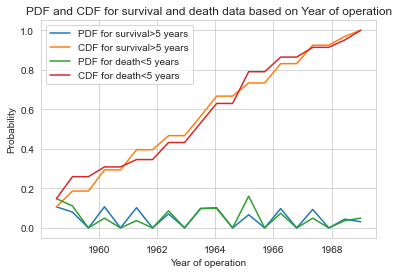

In [83]:
counts, bin_edges = np.histogram(df_survival_gr_5y["Year of operation"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
counts, bin_edges = np.histogram(df_died_ls_5y["Year of operation"],bins=20,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)
plt.xlabel("Year of operation")
plt.ylabel("Probability")
plt.title("PDF and CDF for survival and death data based on Year of operation")
plt.legend(["PDF for survival>5 years","CDF for survival>5 years",
           "PDF for death<5 years","CDF for death<5 years"])
plt.show()

**Observations:**

1. we can say from this graph like, the death rate was very minimal for people having age less than 40 years
2. persons with more age have high prone to death even after the operation 

In [141]:
print("means:")
print(df_survival_gr_5y["No.of auxillary nodes"].mean())
print(df_died_ls_5y["No.of auxillary nodes"].mean())
print("stds:")
print(df_survival_gr_5y["No.of auxillary nodes"].std())
print(df_died_ls_5y["No.of auxillary nodes"].std())

means:
2.7911111111111113
7.45679012345679
stds:
5.870318127719728
9.185653736555782


**Observations:**

so most of axillary nodes data for patients survival >5 yrs lies in 2.79+3(5.87), 2.79-3(5.87)

In [71]:
print("medians:")
print(df_survival_gr_5y["No.of auxillary nodes"].median())
print(df_died_ls_5y["No.of auxillary nodes"].median())

medians:
0.0
4.0


**Observations:**

1. Median is 0 in first case as its the survival rate
2. we have seen that having 0 axillary nodes will have more survival rate


In [143]:
print("Quantiles:")
print(np.percentile(df_survival_gr_5y["No.of auxillary nodes"],np.arange(0,100,25)))
print(np.percentile(df_died_ls_5y["No.of auxillary nodes"],np.arange(0,100,25)))

## [0 0 0 3] -> means 0th percentile of data having 0 axillary nodes

## 25th, 50th percentile of the data having 0 axillary nodes

## 75th percentile( 3/4 th) of data having 0-3 axillary nodes

Quantiles:
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]


**Observations:**

1. [0 0 0 3] -> means 0th percentile of data having 0 axillary nodes

2. 25th, 50th percentile of the data having 0 axillary nodes

3. 75th percentile( 3/4 th) of data having 0-3 axillary nodes

# Box plot:

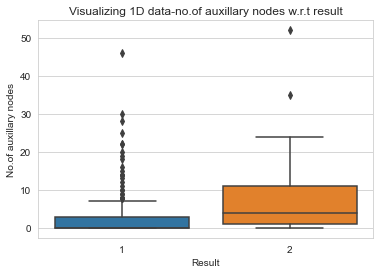

In [75]:
sns.boxplot(x='Result',y='No.of auxillary nodes', data=df)
plt.title("Visualizing 1D data-no.of auxillary nodes w.r.t result")
plt.show()

**Observations:**
1. Patients having more auxillary nodes are having high chance of death after 5 yrs of operation
2. Patients having less auxillary nodes are having high chance of survival after the operation
3. As there are many outliers, even with high auxillary node count the patients survived after the operation 

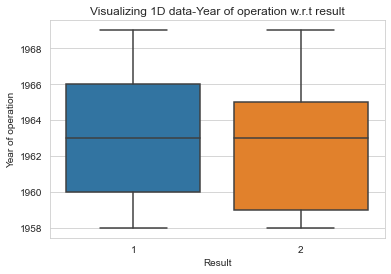

In [81]:
sns.boxplot(x='Result',y='Year of operation', data=df)
plt.title("Visualizing 1D data-Year of operation w.r.t result")
plt.show()

**Observations:**

1. At the earlier stages of years, patients died more even after the operations, may be due to non advancement in technology
2. And the survival rate has been increased after some time gradually due to sophisticated instruments

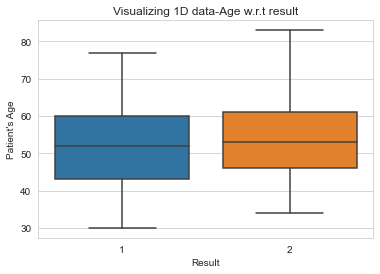

In [82]:
sns.boxplot(x='Result',y='Patient\'s Age', data=df)
plt.title("Visualizing 1D data-Age w.r.t result")
plt.show()

**Observations:**

1. patients Age>77, irrespective of the axillary nodes, mostly have died within less than 5 yrs of operation
2. patients Age<35, mostly have survived irrespective of the axillary nodes

# Violin plot: 

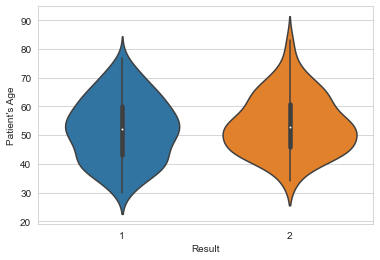

In [146]:
sns.violinplot(x="Result", y="Patient\'s Age", data=df, size=8)
plt.show()

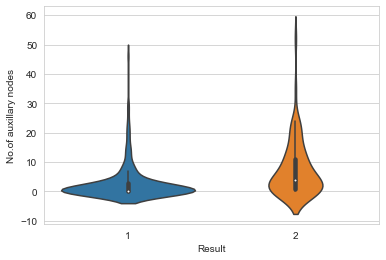

In [147]:
sns.violinplot(x='Result',y='No.of auxillary nodes', data=df, size=8)
plt.show()

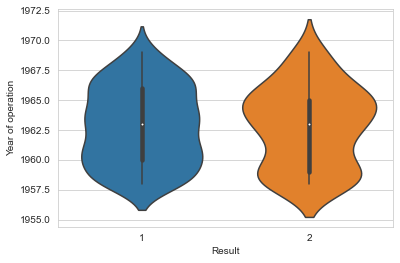

In [78]:
sns.violinplot(x='Result',y='Year of operation', data=df, size=8)
plt.show()

# Multivariate analysis(countours)

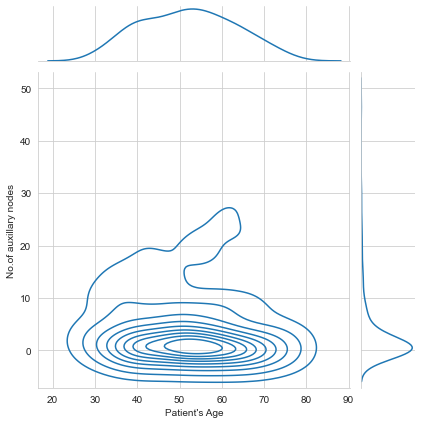

In [149]:
sns.jointplot(x='Patient\'s Age',y='No.of auxillary nodes', data=df_survival_gr_5y, kind="kde");
plt.show();

## For multivariate analysis, we can see the density is more in middle and causing a peak at middle